# Analiza meta-podataka

## Učitavanje skupa meta-podataka

In [3]:
# upload: Data_Entry_2017_v2020.csv, train_val_list.txt, test_list.txt
# https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468
# https://nihcc.app.box.com/v/ChestXray-NIHCC/file/256056636701
# https://nihcc.app.box.com/v/ChestXray-NIHCC/file/256055473534
# 
from google.colab import files
uploaded = files.upload()

Saving Data_Entry_2017_v2020.csv to Data_Entry_2017_v2020.csv
Saving test_list.txt to test_list.txt
Saving train_val_list.txt to train_val_list.txt


In [201]:
import numpy as np
import pandas as pd
imageMetaData = pd.read_csv("Data_Entry_2017_v2020.csv", sep=',')

## Analiza skupa meta-podataka i priprema za sledeću fazu

In [202]:
print("Broj redova u skupu meta podataka: ", imageMetaData.shape[0])
print("Broj atributa(kolona)", imageMetaData.shape[1])
print("----------- \nNazivi atributa: ")
for col in imageMetaData.columns:
  print(col)

Broj redova u skupu meta podataka:  112120
Broj atributa(kolona) 11
----------- 
Nazivi atributa: 
Image Index
Finding Labels
Follow-up #
Patient ID
Patient Age
Patient Gender
View Position
OriginalImage[Width
Height]
OriginalImagePixelSpacing[x
y]


In [203]:
imageMetaData.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [204]:
print("Prosek godina pacijenata: ", imageMetaData['Patient Age'].mean())
print("Godine najstarijeg pacijenta: ", imageMetaData['Patient Age'].max())
print("Godine najmlađeg pacijenta: ", imageMetaData['Patient Age'].min())

Prosek godina pacijenata:  46.62636460934713
Godine najstarijeg pacijenta:  95
Godine najmlađeg pacijenta:  0


In [205]:
imageMetaData.groupby('Patient Age')['Patient ID'].count().sort_values(ascending=False)

Patient Age
58    2969
57    2944
52    2937
55    2918
56    2847
      ... 
93      11
89       8
92       6
94       3
95       1
Name: Patient ID, Length: 96, dtype: int64

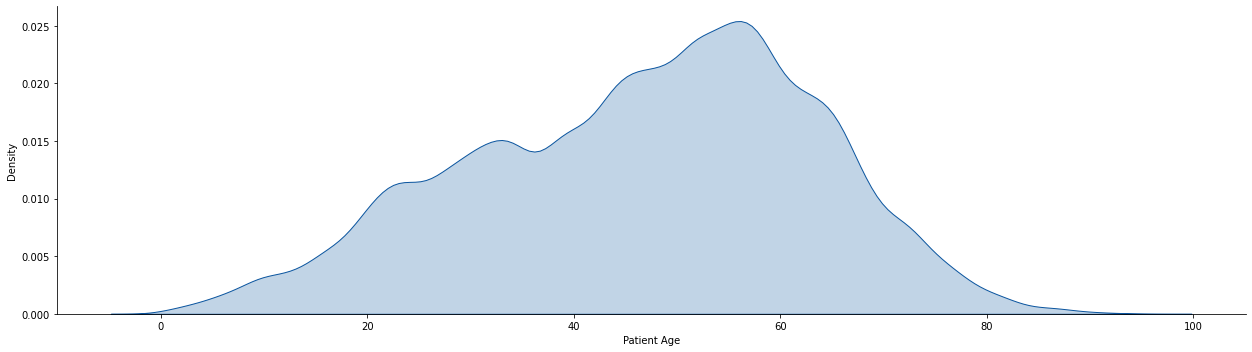

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Blues_r")
sns.displot(data=imageMetaData, x="Patient Age", kind="kde", fill=True, aspect=3.5);

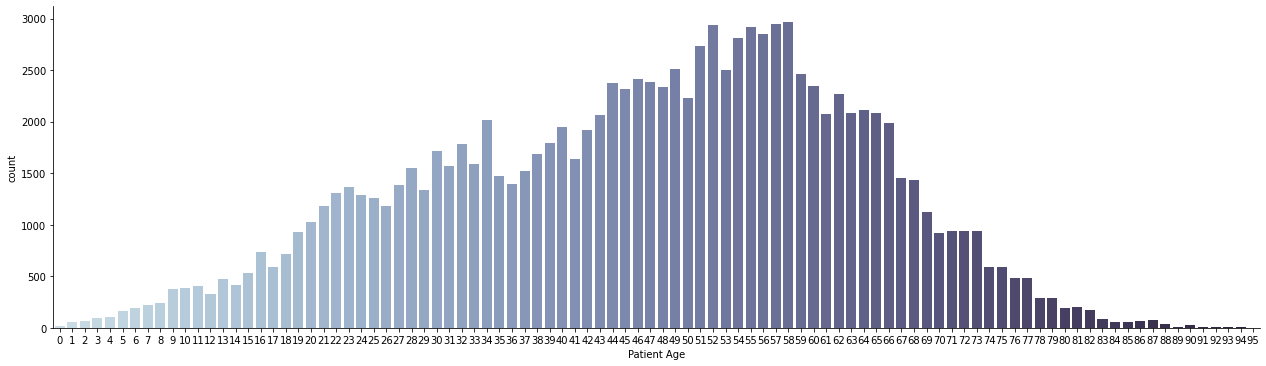

In [207]:
sns.catplot(x="Patient Age", kind="count", palette="ch:s=.25,rot=-.25", data=imageMetaData, aspect=3.5);

In [208]:
imageMetaData['Patient Gender'].value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

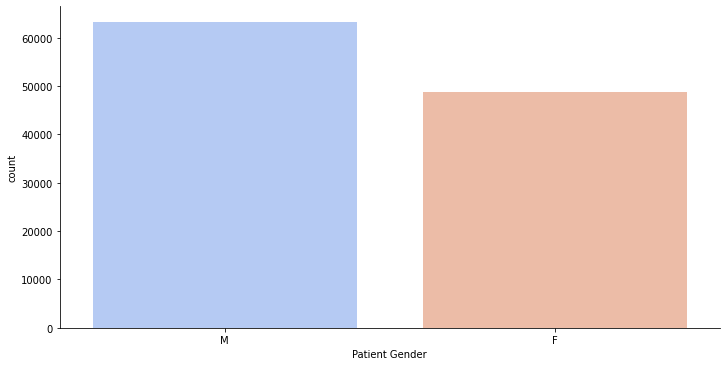

In [209]:
sns.catplot(x='Patient Gender', data=imageMetaData, kind="count", palette="coolwarm", aspect=2);

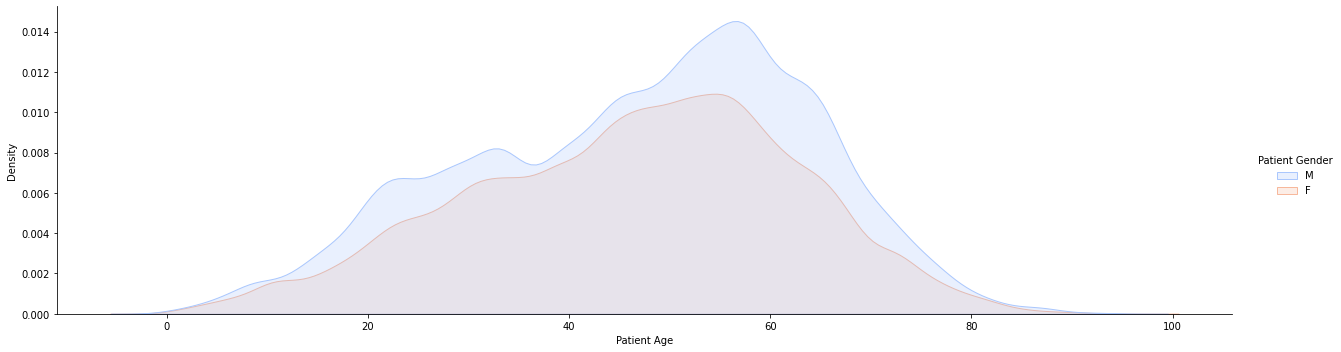

In [210]:
sns.displot(data=imageMetaData, x="Patient Age", hue="Patient Gender", palette="coolwarm", kind="kde", fill=True, aspect=3.5);

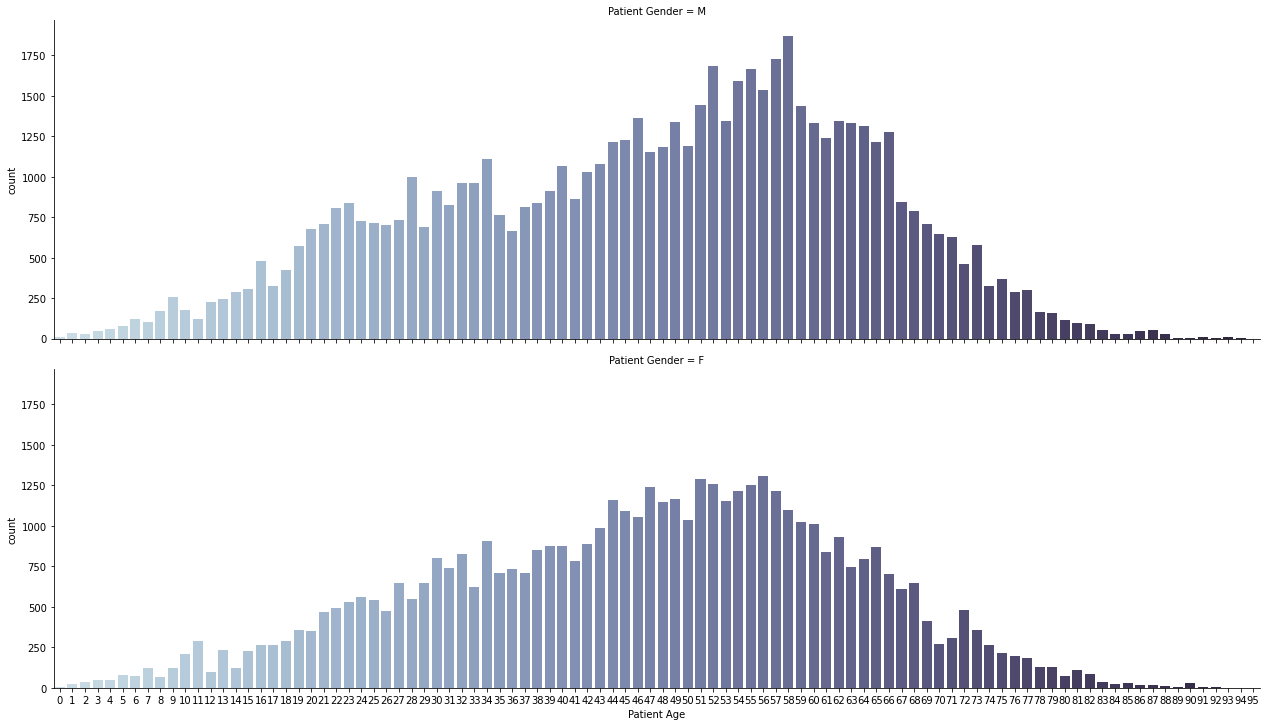

In [211]:
sns.catplot(x="Patient Age", data=imageMetaData, col="Patient Gender", kind="count", aspect=3.5, col_wrap=1, palette="ch:s=.25,rot=-.25");

In [212]:
imageMetaData['Finding Labels'] = imageMetaData['Finding Labels'].astype(str).str.split('|')

# number of patients with more than 1 diagnosis
imageMetaData[imageMetaData['Finding Labels'].str.len() > 1].shape[0]

20796

In [213]:
imageMetaData.loc[:,'Finding Labels'] = imageMetaData['Finding Labels'].map(lambda x: x[0])
imageMetaData.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [214]:
imageMetaData.groupby("Patient Gender")["Finding Labels"].value_counts()

Patient Gender  Finding Labels    
F               No Finding            26439
                Infiltration           5055
                Atelectasis            4648
                Effusion               3533
                Consolidation          1363
                Nodule                 1318
                Cardiomegaly           1284
                Pneumothorax           1196
                Mass                   1139
                Edema                   880
                Emphysema               635
                Fibrosis                548
                Pleural_Thickening      515
                Pneumonia               130
                Hernia                   97
M               No Finding            33922
                Atelectasis            6897
                Infiltration           6740
                Effusion               4507
                Consolidation          1968
                Mass                   1787
                Nodule                 16

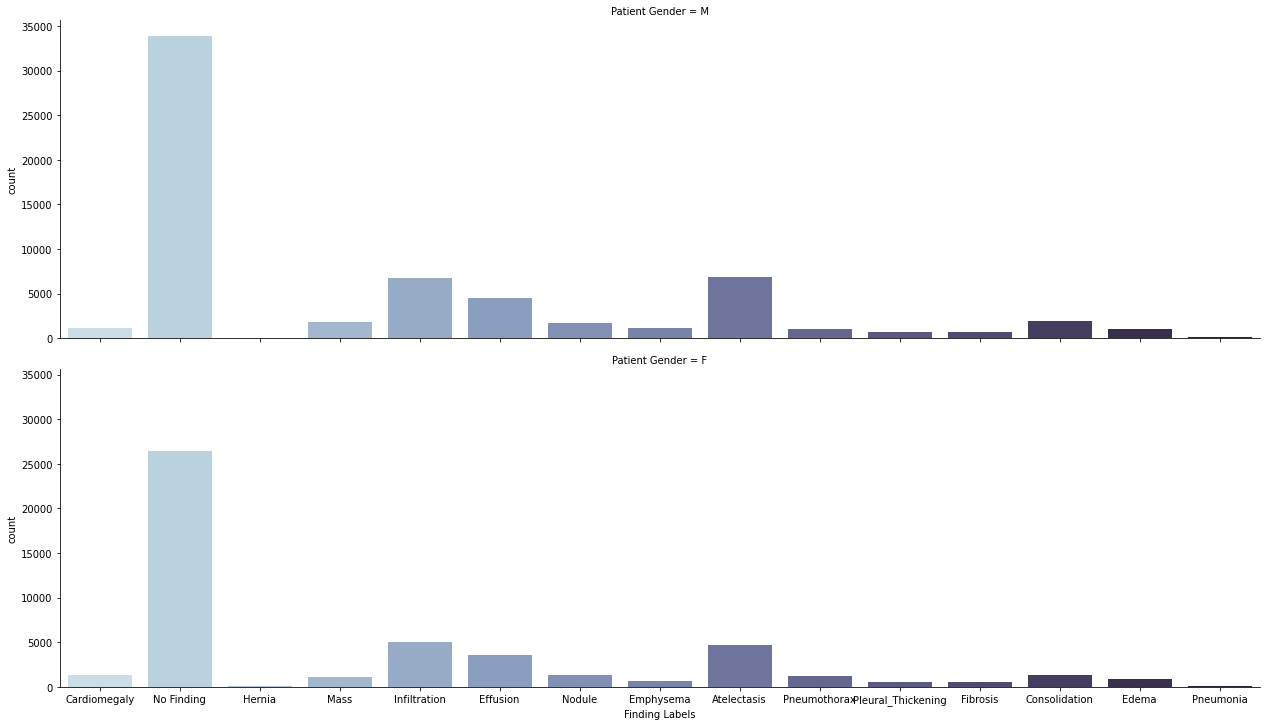

In [215]:
sns.catplot(x="Finding Labels", data=imageMetaData, col="Patient Gender", kind="count", aspect=3.5, col_wrap=1, palette="ch:s=.25,rot=-.25");

In [216]:
imageMetaData.groupby('Patient ID')['Image Index'].count().sort_values(ascending=False)

Patient ID
10007    184
13670    173
15530    158
12834    157
13993    143
        ... 
18797      1
18798      1
18799      1
18800      1
15403      1
Name: Image Index, Length: 30805, dtype: int64

In [217]:
# Various diagnoses given to the same patient (3 patients isolated from the list based on their id)
print("Patient number 10007: No. of diagnosis: %d" %(len(imageMetaData[imageMetaData['Patient ID'] == 10007]['Finding Labels'].unique())))
print("Patient number 12834: No. of diagnosis: %d" %(len(imageMetaData[imageMetaData['Patient ID'] == 12834]['Finding Labels'].unique())))
print("Patient number 13993: No. of diagnosis: %d" %(len(imageMetaData[imageMetaData['Patient ID'] == 13993]['Finding Labels'].unique())))

Patient number 10007: No. of diagnosis: 9
Patient number 12834: No. of diagnosis: 11
Patient number 13993: No. of diagnosis: 8


In [218]:
imageMetaData = imageMetaData[['Image Index','Patient ID','Finding Labels']]
imageMetaData = imageMetaData.set_index(np.arange(len(imageMetaData)))
imageMetaData.head()

,Image Index,Patient ID,Finding Labels
0,00000001_000.png,1,Cardiomegaly
1,00000001_001.png,1,Cardiomegaly
2,00000001_002.png,1,Cardiomegaly
3,00000002_000.png,2,No Finding
4,00000003_001.png,3,Hernia


In [219]:
labels = imageMetaData['Finding Labels'].value_counts().sort_values(ascending=False)
labels

No Finding            60361
Infiltration          11795
Atelectasis           11545
Effusion               8040
Consolidation          3331
Nodule                 3009
Mass                   2926
Cardiomegaly           2404
Pneumothorax           2200
Edema                  1862
Emphysema              1734
Pleural_Thickening     1217
Fibrosis               1215
Pneumonia               325
Hernia                  156
Name: Finding Labels, dtype: int64

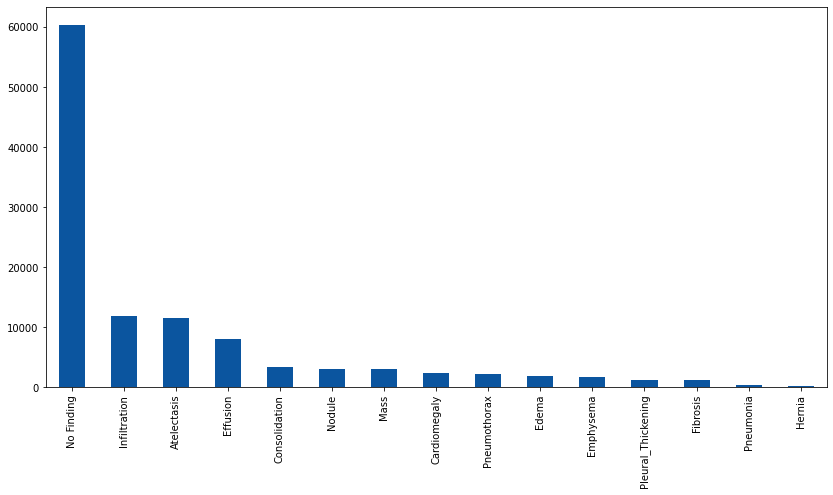

In [220]:
plt.subplots(figsize=(14,7))
labels.plot(kind='bar');

In [221]:
imageMetaData = imageMetaData.rename(columns={"Image Index": "image_path", "Patient ID": "patient_id", "Finding Labels": "labels"})
imageMetaData.head()

,image_path,patient_id,labels
0,00000001_000.png,1,Cardiomegaly
1,00000001_001.png,1,Cardiomegaly
2,00000001_002.png,1,Cardiomegaly
3,00000002_000.png,2,No Finding
4,00000003_001.png,3,Hernia


In [222]:
train_val = pd.read_csv("train_val_list.txt", header=None)
print("Number of images: ", train_val.shape[0])
train_val.head()

Number of images:  86524


,0
0,00000001_000.png
1,00000001_001.png
2,00000001_002.png
3,00000002_000.png
4,00000004_000.png


In [223]:
test = pd.read_csv("test_list.txt", header=None)
print("Number of images: ", test.shape[0])
test.head()

Number of images:  25596


,0
0,00000003_000.png
1,00000003_001.png
2,00000003_002.png
3,00000003_003.png
4,00000003_004.png


In [224]:
test.shape[0] + train_val.shape[0]

112120

In [225]:
maskTrainVal = imageMetaData['image_path'].isin(train_val[0])
trainValImageMetaData = imageMetaData[maskTrainVal]
trainValImageMetaData = trainValImageMetaData.set_index(np.arange(len(trainValImageMetaData)))
trainValImageMetaData.shape[0]

86524

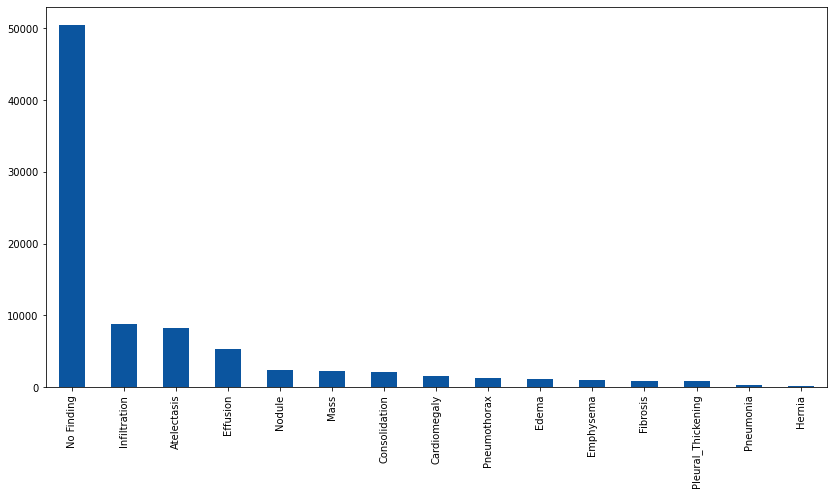

In [226]:
plt.subplots(figsize=(14,7))
trainValImageMetaData.labels.value_counts().sort_values(ascending=False).plot(kind="bar");

In [227]:
trainValImageMetaData.head()

,image_path,patient_id,labels
0,00000001_000.png,1,Cardiomegaly
1,00000001_001.png,1,Cardiomegaly
2,00000001_002.png,1,Cardiomegaly
3,00000002_000.png,2,No Finding
4,00000004_000.png,4,Mass


In [228]:
from sklearn.model_selection import train_test_split

patientIndices = list(range(len(trainValImageMetaData.patient_id)))

trainValImageMetaData = trainValImageMetaData.set_index('patient_id')

trainIndices, validIndices = train_test_split(patientIndices, test_size=0.2, stratify=trainValImageMetaData.labels)

trainImageMetaData = trainValImageMetaData.iloc[trainIndices, :]
validImageMetaData = trainValImageMetaData.iloc[validIndices, :]

print(trainImageMetaData.shape)
print(validImageMetaData.shape)

(69219, 2)
(17305, 2)


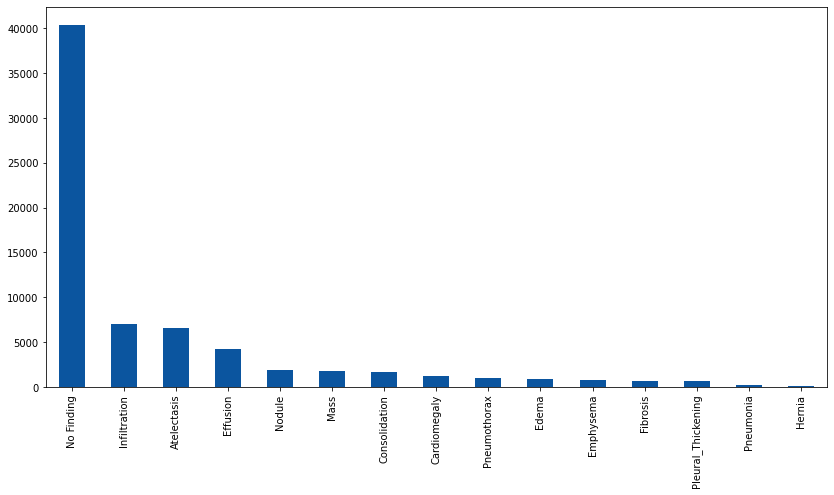

In [229]:
plt.subplots(figsize=(14,7))
trainImageMetaData.labels.value_counts().sort_values(ascending=False).plot(kind="bar");

In [230]:
trainImageMetaData = trainImageMetaData.set_index(np.arange(len(trainImageMetaData)))
trainImageMetaData.head()

,image_path,labels
0,00002954_005.png,No Finding
1,00017700_000.png,No Finding
2,00012233_005.png,Pneumothorax
3,00007354_010.png,Infiltration
4,00008191_001.png,Atelectasis


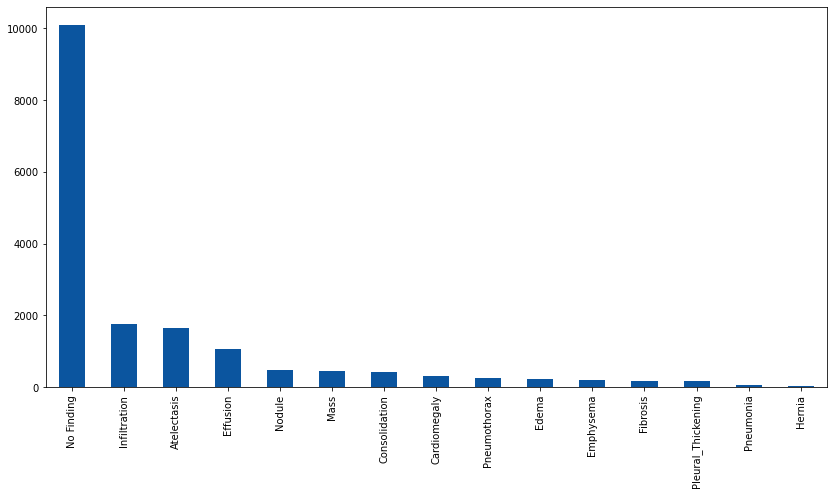

In [231]:
plt.subplots(figsize=(14,7))
validImageMetaData.labels.value_counts().sort_values(ascending=False).plot(kind="bar");

In [232]:
validImageMetaData = validImageMetaData.set_index(np.arange(len(validImageMetaData)))
validImageMetaData.head()

,image_path,labels
0,00003308_002.png,No Finding
1,00016621_000.png,Pleural_Thickening
2,00028811_002.png,Effusion
3,00017044_008.png,Consolidation
4,00020703_023.png,No Finding


In [233]:
maskTest = imageMetaData['image_path'].isin(test[0])
testImageMetaData = imageMetaData[maskTest]
testImageMetaData = testImageMetaData.set_index(np.arange(len(testImageMetaData)))
testImageMetaData.shape[0]

25596

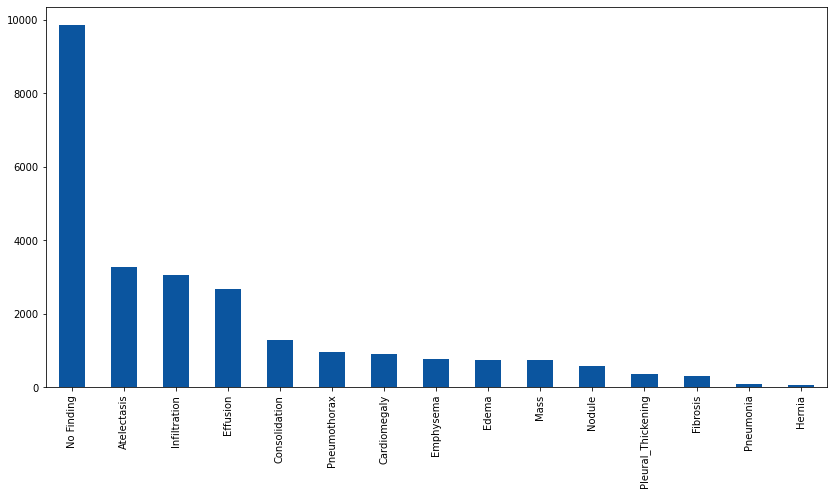

In [234]:
plt.subplots(figsize=(14,7))
testImageMetaData.labels.value_counts().sort_values(ascending=False).plot(kind="bar");

In [235]:
testImageMetaData = testImageMetaData[['image_path','labels']]
testImageMetaData.head()

,image_path,labels
0,00000003_001.png,Hernia
1,00000003_002.png,Hernia
2,00000003_003.png,Hernia
3,00000003_004.png,Hernia
4,00000003_005.png,Hernia


In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
trainImageMetaData.loc[:,'image_path'] = './content/images/' + trainImageMetaData['image_path'].astype(str)
validImageMetaData.loc[:,'image_path'] = './content/images/' + validImageMetaData['image_path'].astype(str)
testImageMetaData.loc[:,'image_path'] = './content/images/' + testImageMetaData['image_path'].astype(str)

In [238]:
trainImageMetaData.head()

,image_path,labels
0,./content/images/00002954_005.png,No Finding
1,./content/images/00017700_000.png,No Finding
2,./content/images/00012233_005.png,Pneumothorax
3,./content/images/00007354_010.png,Infiltration
4,./content/images/00008191_001.png,Atelectasis


In [239]:
validImageMetaData.head()

,image_path,labels
0,./content/images/00003308_002.png,No Finding
1,./content/images/00016621_000.png,Pleural_Thickening
2,./content/images/00028811_002.png,Effusion
3,./content/images/00017044_008.png,Consolidation
4,./content/images/00020703_023.png,No Finding


In [240]:
testImageMetaData.head()

,image_path,labels
0,./content/images/00000003_001.png,Hernia
1,./content/images/00000003_002.png,Hernia
2,./content/images/00000003_003.png,Hernia
3,./content/images/00000003_004.png,Hernia
4,./content/images/00000003_005.png,Hernia


In [241]:
trainImageMetaData.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/nih-chest-x-ray-train.csv', sep=',')
validImageMetaData.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/nih-chest-x-ray-valid.csv', sep=',')
testImageMetaData.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/nih-chest-x-ray-test.csv', sep=',')

# Preuzimanje skupa podataka (radiografskih snimaka) sa stranice [NIH](https://nihcc.app.box.com/v/ChestXray-NIHCC).

In [ ]:
# Nikola Pujaz - Following script is modification of https://nihcc.app.box.com/v/ChestXray-NIHCC/file/371647823217

#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches

import urllib.request
import tarfile
import os

# URLs for the zip files
links = [
  'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
  'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
  'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
  'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
  'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]
# todo
# @tf.function
# def download_dataset(x, y):
#     fname = 'images.tar.gz'
#     urllib.request.urlretrieve(link, fname)  # download the zip file
#     tar = tarfile.open(fname, "r:gz")
#     tar.extractall()
#     tar.close()
#     os.remove(fname)

for idx, link in enumerate(links):
    fname = 'images_%02d.tar.gz' % (idx+1)
    print('Downloading: ' + fname + ' ...')
    urllib.request.urlretrieve(link, fname)  # download the zip file
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
    print('Extracted: ' + fname)
    os.remove(fname)
    print('Removed: ' + fname)
    print('---------------------------')

print('Download complete.')

In [ ]:
# number of images:
!ls images | wc -l

# Pretprocesiranje skupa podataka

In [ ]:
from PIL import Image

main_directory = "/content/images"

IMG_SIZE = (224, 224)

for subdir, dirs, files in os.walk(main_directory):
    for file in files:
        filepath = os.path.join(subdir, file)

        if filepath.endswith(".png"):
            im = Image.open(filepath)
            imResize = im.resize(IMG_SIZE, Image.ANTIALIAS)
            imResize.save(filepath, quality=100)

In [ ]:
# number of images:
!ls images | wc -l

In [ ]:
!zip -r -q images-nih-chest /content/images
!cp images-nih-chest.zip /content/drive/MyDrive